# Predict Boston House Prices 

### This project is to create linear regresion model to predict hose prices in Boston.

First let's imports all required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import boston dataset from Scikit Learn library ** 

we can import boston dataset from the scikit-learn

In [80]:
from sklearn.datasets import load_boston
boston = load_boston()

### Exploratory Data Analysis
Convert boston dataset to Pandas dataframe and show sample data and check the data inside boston dataset

In [82]:
boston_df = pd.DataFrame(boston.data)
# Convert index to column name using dataset feature names 
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


** Attribute Information (in order) **

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per 10000 (USD)
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in 1000 (USD)'s


In [83]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [84]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [85]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [86]:
X = boston_df
y = boston.target
print( "shape of X = ", X.shape, " shape of y = ", y.shape )

shape of X =  (506, 13)  shape of y =  (506,)


## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
print(X_train.shape, y_train.shape )
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


## Creating and Training the Model

In [94]:
# Import LinearRegression from Scikit Learn library
from sklearn.linear_model import LinearRegression

In [95]:
lm = LinearRegression()

In [96]:
# Train/fit lm on the training data.
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [97]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ -1.32774155e-01   3.57812335e-02   4.99454423e-02   3.12127706e+00
  -1.54698463e+01   4.04872721e+00  -1.07515901e-02  -1.38699758e+00
   2.42353741e-01  -8.69095363e-03  -9.11917342e-01   1.19435253e-02
  -5.48080157e-01]


In [98]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
CRIM,-0.132774
ZN,0.035781
INDUS,0.049945
CHAS,3.121277
NOX,-15.469846
RM,4.048727
AGE,-0.010752
DIS,-1.386998
RAD,0.242354
TAX,-0.008691


### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **RM (average number of rooms)** is associated with an **increase of \$4,048 **.
- Holding all other features fixed, a 1 unit increase in **CHAS (bounds river)** is associated with an **increase of \$3,121 **.
- Holding all other features fixed, a 1 unit increase in **NOX (nitric oxides concentration)** is associated with an **decrease of \$15,469 **.
- Holding all other features fixed, a 1 unit increase in **PTRATIO (pupil-teacher ratio)** is associated with an **decrease of \$911 **.


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [99]:
predictions = lm.predict(X_test)

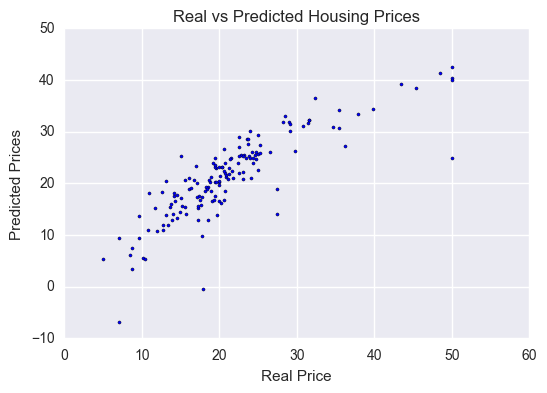

In [100]:
#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test, predictions, s=5 )
plt.xlabel('Real Price')
plt.ylabel('Predicted Prices')
plt.title( "Real vs Predicted Housing Prices")

In [101]:
lm.score(X_test, y_test)

0.71092035863263514

#### Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [102]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.16560523149
MSE: 21.5402189439
RMSE: 4.64114414169


## Plotting Residuals

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


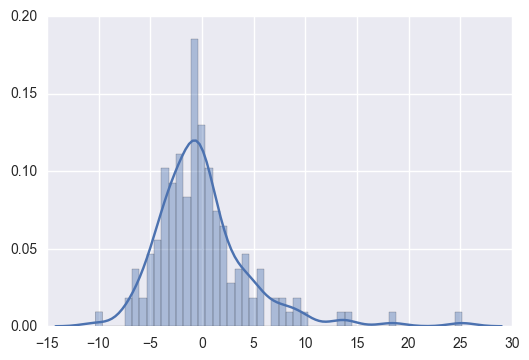

In [103]:
sns.distplot((y_test-predictions),bins=50);

In [104]:
# print the intercept
print(lm.intercept_)

31.6821485821
